### 导论Homework15-16
#### 10235501435张凯诚

先导入需要的库

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

#### 1.人口统计分析

##### 1.1 国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。

In [62]:
# 读取原始数据
df = pd.read_csv('users_combined_info_500.csv')

# 检查原始数据和缺失值
print(f"原始数据总行数: {len(df)}")
print(f"去重前unique name数量: {df['name'].nunique()}")
print(f"\n缺失值统计:")
print(df['country'].isnull().sum(), "条country记录为空")

# 删除country为空的记录
df_clean = df.dropna(subset=['country'])
print(f"\n删除空country后:")
print(f"剩余数据总行数: {len(df_clean)}")
print(f"剩余unique name数量: {df_clean['name'].nunique()}")

# 基于name列去重并验证
df_unique = df_clean.drop_duplicates(subset=['name'])
print(f"\n去重后的用户数: {len(df_unique)}")

# 按country分组计数并验证
country_counts = df_unique['country'].value_counts().reset_index()
country_counts.columns = ['country', 'user_count']
total_users = country_counts['user_count'].sum()
print(f"按国家统计后的总用户数: {total_users}")

# 保存结果到csv
country_counts.to_csv('country_user_counts.csv', index=False)

原始数据总行数: 1294776
去重前unique name数量: 497

缺失值统计:
88151 条country记录为空

删除空country后:
剩余数据总行数: 1206625
剩余unique name数量: 462

去重后的用户数: 462
按国家统计后的总用户数: 462


有35个用户的country字段可能为空(NULL或NaN)
预期500人，实际只有497人，说明可能有3个用户的数据缺失


=== 开发者地理分布分析 ===
总用户数: 462

主要开发者集中地:
       country  user_count  percentage
 United States         122       26.41
       Germany          59       12.77
         China          34        7.36
        France          24        5.19
        Canada          24        5.19
United Kingdom          21        4.55
   Netherlands          18        3.90
     Australia          15        3.25
   Switzerland          14        3.03
         Japan          13        2.81
         Italy          10        2.16
        Poland          10        2.16
         Spain           7        1.52
   New Zealand           7        1.52
       Austria           6        1.30
       Czechia           6        1.30
        Sweden           5        1.08
       Denmark           5        1.08
        Others          62       13.48


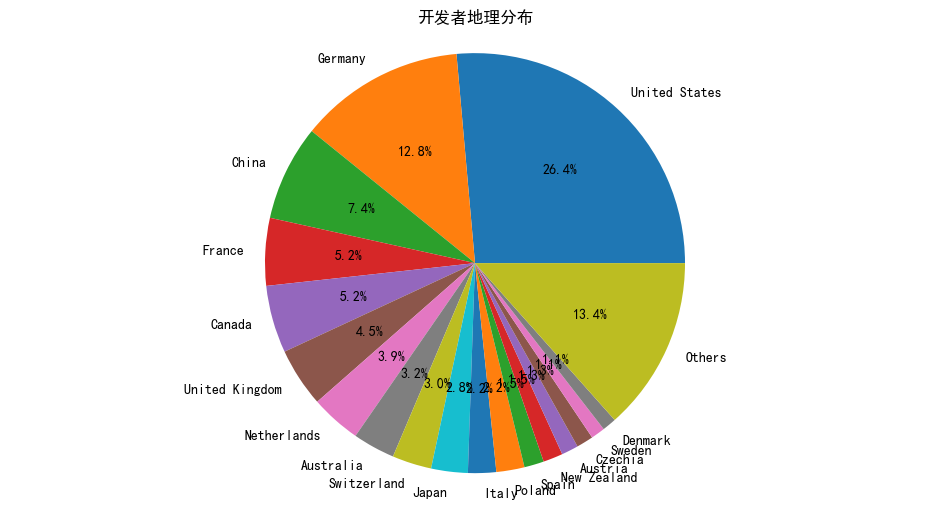

In [63]:
# 读取已有的统计数据
df = pd.read_csv('country_user_counts.csv')
total_users = df['user_count'].sum()

# 计算百分比
df['percentage'] = (df['user_count'] / total_users * 100).round(2)

# 识别主要开发者集中地(用户数>10或占比>1%)
major_countries = df[
    (df['user_count'] > 10) | 
    (df['percentage'] > 1)
]

# 其他国家归类为"Others"
others = pd.DataFrame({
    'country': ['Others'],
    'user_count': [df[~df['country'].isin(major_countries['country'])]['user_count'].sum()],
    'percentage': [df[~df['country'].isin(major_countries['country'])]['percentage'].sum()]
})

# 合并结果
final_stats = pd.concat([major_countries, others])

# 输出结果
print("\n=== 开发者地理分布分析 ===")
print(f"总用户数: {total_users}")
print("\n主要开发者集中地:")
print(final_stats.to_string(index=False))

# 可视化
plt.figure(figsize=(12, 6))
plt.pie(final_stats['user_count'], labels=final_stats['country'], autopct='%1.1f%%')
plt.title('开发者地理分布')
plt.axis('equal')
plt.show()

##### 1.2 城市级别分布：分析主要城市的开发者密度，发现技术热点区域。

In [64]:
df = pd.read_csv('users_combined_info_500.csv')
# 读取数据
city_counts = df['location'].value_counts()
# 检查原始数据
print(f"原始数据总行数: {len(df)}")
print(f"去重前unique name数量: {df['name'].nunique()}")

# 基于name列去重并验证
df_unique = df.drop_duplicates(subset=['name'])
print(f"去重后的用户数: {len(df_unique)}")

# 按location分组统计
location_counts = df_unique.groupby('location')['name'].count().reset_index()
location_counts.columns = ['location', 'count']
print(f"\n按location统计后的总用户数: {location_counts['count'].sum()}")

# 查看unique location的数量
print(f"\n不同的location数量: {df_unique['location'].nunique()}")
# 将结果保存到文件
location_counts.to_csv('city_statistics.csv')

原始数据总行数: 1294776
去重前unique name数量: 497
去重后的用户数: 497

按location统计后的总用户数: 497

不同的location数量: 342


In [65]:

# 读取CSV文件
df = pd.read_csv('city_statistics.csv')

# 扩充需要过滤的patterns
non_cities = [
    # 国家和地区名称
    'Germany', 'Japan', 'France', 'Switzerland', 'UK', 'Netherlands', 
    'Poland', 'Sweden', 'Italy', 'China', 'Malaysia', 'Belgium', 'Denmark',
    'Canada', 'Czechia', 'Ireland', 'Tunisia', 'India', 'Spain', 'Brazil',
     'USA', 'Georgia', 'Finland', 'Russia', 'Turkey', 'Lithuania',
    'United Kingdom', 'United States', 'Australia', 'New Zealand', 'Vietnam',
    'Egypt', 'Hungary', 'Portugal', 'South korea', 'Scotland', 'Delaware',
    'Southern California', 'Bavaria', 'The Netherlands','CHN','Estonia','Norway',
    
    # 州/省/区域
    'California', 'Texas', 'Massachusetts', 'Colorado', 'Saskatchewan',
    'Europe', 'European Union', 'Washington State', 'Illinois', 'florida','Taiwan', 'CHN, Shandong',
    
    # 技术相关
    '0.0.0.0', '::1', 'localhost', '$HOME', '$PYTHONPATH', 'undefined',
    'ed25519/0x156B038E61A4C823',
    
    # 抽象/虚构位置
    'Earth', 'Planet Earth', 'Internet', 'CYBERSPACE', 'Solar system',
    'The Internet', 'The Blue Planet', 'Skies', 'mars', '天堂度假村',
    'きさらぎ駅', 'GPS based...', 'Ether', 'The Nearest Event Horizon',
    'Acheron, Hades', 'I\'m on earth right now.', 'Lyoko','I’m on earth right now.',
    'Spain ⇄ California','Vesuvius','MDCC','Acheron',
    
    # 时区相关
    'UTC+1', 'UTC+2', 'America/Vancouver', 'Europe (CET)',
    
    # 特殊格式和字符
    '☁️', '</>', '.', '5 centimeters from the screen',
    'Everything everywhere all at once.', 'SPb/BG/NYC'
]

def is_valid_city(location):
    # 转换为小写进行比较
    location_lower = str(location).lower()
    
    # 修改过滤逻辑，使用精确匹配或分词匹配
    location_parts = location_lower.split(',')
    main_city = location_parts[0].strip()
    
    # 检查主城市名是否在非法名单中
    if main_city in [x.lower() for x in non_cities]:
        return False
           
    # 过滤特殊字符
    if any(char in '☁️<>/\\$' for char in location):
        return False
        
    # 过滤只包含国家名的条目
    if ',' in location and any(country in location for country in ['USA', 'US', 'UK', 'UAE']):
        return True
        
    return True

# 应用过滤
cleaned_df = df[df['location'].apply(is_valid_city)]

# 保存清洗后的数据
cleaned_df.to_csv('cleaned_city_statistics.csv', index=False)

print(f"原始数据行数: {len(df)}")
print(f"清洗后数据行数: {len(cleaned_df)}")

原始数据行数: 342
清洗后数据行数: 241



技术热点区域统计表：
                   City  Developer Count  Percentage
0         San Francisco               11       13.58
1              New York               10       12.35
2               Beijing                9       11.11
3       Berlin, Germany                7        8.64
4         Paris, France                6        7.41
5          Tokyo, Japan                5        6.17
6              Hangzhou                5        6.17
7                Berlin                5        6.17
8   Zurich, Switzerland                4        4.94
9             Singapore                4        4.94
10             Shanghai                3        3.70
11           London, UK                3        3.70
12               London                3        3.70
13    Sydney, Australia                3        3.70
14      Vienna, Austria                3        3.70


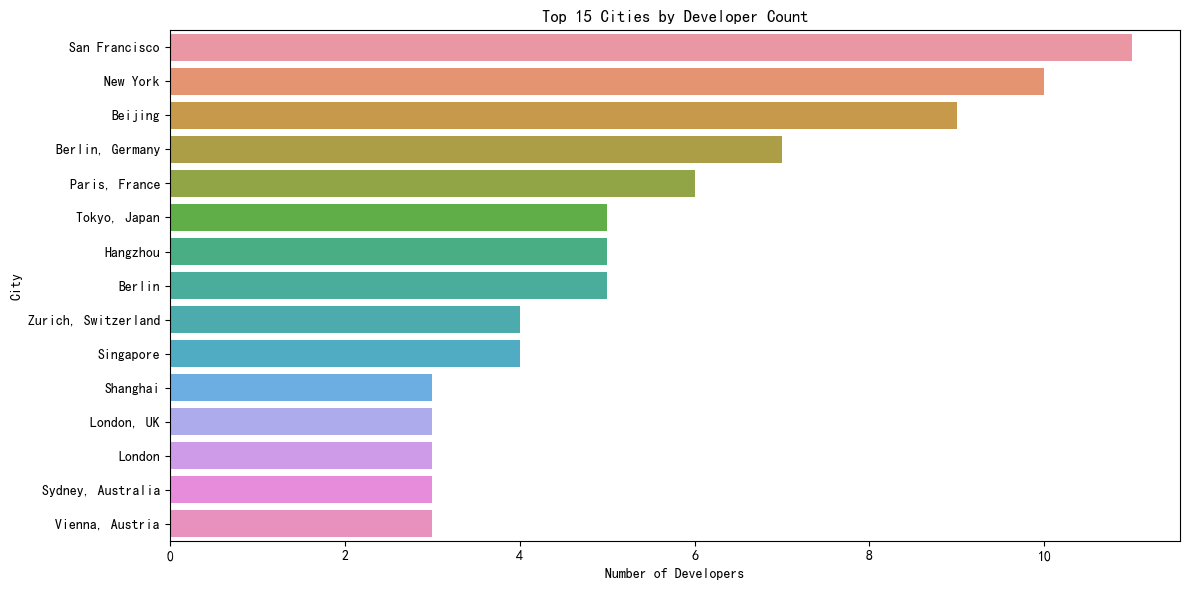

In [66]:

# 读取数据
df = pd.read_csv('cleaned_city_statistics.csv')

# 合并相同城市的数据（考虑不同写法的城市名）
city_mapping = {
    'NYC': 'New York',
    'New York, NY': 'New York',
    'New York, New York': 'New York',
    'nyc': 'New York',
    'San Francisco, CA': 'San Francisco',
    'Beijing China': 'Beijing',
    'Beijing, China': 'Beijing',
    '北京': 'Beijing',
    'Peking': 'Beijing',
    'Hangzhou,China': 'Hangzhou',
    'Hangzhou China': 'Hangzhou',
    'HangZhou': 'Hangzhou',
    'hangzhou': 'Hangzhou'
}

# 应用映射关系
df['location'] = df['location'].replace(city_mapping)

# 按城市分组并计算总和
city_totals = df.groupby('location')['count'].sum().sort_values(ascending=False)

# 获取前15个城市
top_15 = city_totals.head(15)


# 创建统计表格
stats_df = pd.DataFrame({
    'City': top_15.index,
    'Developer Count': top_15.values,
    'Percentage': (top_15.values / top_15.sum() * 100).round(2)
})

print("\n技术热点区域统计表：")
# 设置显示选项
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 直接打印DataFrame
print(stats_df)
# 创建可视化
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15.values, y=top_15.index)
plt.title('Top 15 Cities by Developer Count')
plt.xlabel('Number of Developers')
plt.ylabel('City')

# 显示图表
plt.tight_layout()
plt.show()


##### 1.3 时区分布:了解用户的时区分布，分析不同地区用户的协作时间模式。

In [67]:
# 定义城市时区映射
city_timezone_map = {
    # 北美洲
    ## 美国东部 (UTC-5)
    'NYC': 'UTC-5',
    'nyc': 'UTC-5',
    'New York': 'UTC-5',
    'Brooklyn': 'UTC-5',
    'Philadelphia': 'UTC-5',
    'Boston': 'UTC-5',
    'Cambridge': 'UTC-5',
    'Princeton': 'UTC-5',
    'Amherst': 'UTC-5',
    'Richmond': 'UTC-5',
    'Phoenixville': 'UTC-5',
    'Villanova': 'UTC-5',
    'Pittsburgh': 'UTC-5',
    'Baltimore': 'UTC-5',
    'Redwood City': 'UTC-5',
    'Miami': 'UTC-5',
    'Tallahassee': 'UTC-5',
    'Delaware (but Philly at heart)': 'UTC-5',
    'Raleigh': 'UTC-5',
    'New Haven': 'UTC-5',

    ## 美国中部 (UTC-6)
    'Chicago': 'UTC-6',
    'Minneapolis': 'UTC-6',
    'Madison': 'UTC-6',
    'Little Rock': 'UTC-6',
    'Houston': 'UTC-6',
    'Austin': 'UTC-6',
    'Oak Park': 'UTC-6',
    'Appleton': 'UTC-6',
    'Hot Springs': 'UTC-6',
    'Wisconsin': 'UTC-6',
    'New Orleans': 'UTC-6',
    'Arkansas': 'UTC-6',

    ## 美国山地时区 (UTC-7)
    'Palisade': 'UTC-7',

    ## 美国西部 (UTC-8)
    'San Francisco': 'UTC-8',
    'Los Angeles': 'UTC-8',
    'Seattle': 'UTC-8',
    'Portland': 'UTC-8',
    'Berkeley': 'UTC-8',
    'Palo Alto': 'UTC-8',
    'San Jose': 'UTC-8',
    'Cupertino': 'UTC-8',
    'Mountain View': 'UTC-8',
    'Menlo Park': 'UTC-8',
    'Oakland': 'UTC-8',
    'Sunnyvale': 'UTC-8',
    'Bothell': 'UTC-8',
    'Redmond': 'UTC-8',
    'Boise': 'UTC-8',
    'Eugene': 'UTC-8',
    'Boulder': 'UTC-8',
    'Bend': 'UTC-8',
    'San Diego': 'UTC-8',
    'Las Vegas': 'UTC-8',
    'Los Alamos': 'UTC-8',
    'Idaho Falls': 'UTC-8',
    'Redmond Washington USA': 'UTC-8',
    'Oakland CA': 'UTC-8',
    'Boise ID': 'UTC-8',
    'San Francisco Bay Area': 'UTC-8',
    'Hillsborough': 'UTC-8',

    # 加拿大
    'Toronto': 'UTC-5',
    'Montreal': 'UTC-5',
    'Montréal': 'UTC-5',
    'Vancouver': 'UTC-8',
    'Waterloo': 'UTC-5',
    'Quebec': 'UTC-5',
    'Québec': 'UTC-5',
    'Kitchener': 'UTC-5',
    'Victoria': 'UTC-7',
    'Winnipeg': 'UTC-6',
    'Shefford': 'UTC-5',

    # 欧洲
    ## 英国和爱尔兰 (UTC+0/+1)
    'London': 'UTC+0',
    'Edinburgh': 'UTC+0',
    'Cardiff': 'UTC+0',
    'Reading': 'UTC+0',
    'Norwich': 'UTC+0',
    'Martock': 'UTC+0',
    'Glasgow': 'UTC+1',
    'Kilkenny': 'UTC+1',
    'Oxford': 'UTC+1',

    ## 中欧/西欧 (UTC+1)
    'Prague': 'UTC+1',
    'Berlin': 'UTC+1',
    'Munich': 'UTC+1',
    'München': 'UTC+1',
    'Paris': 'UTC+1',
    'Amsterdam': 'UTC+1',
    'Vienna': 'UTC+1',
    'Milan': 'UTC+1',
    'Warsaw': 'UTC+1',
    'Barcelona': 'UTC+1',
    'Zurich': 'UTC+1',
    'Zürich': 'UTC+1',
    'Oslo': 'UTC+1',
    'Copenhagen': 'UTC+1',
    'Stockholm': 'UTC+1',
    'Budapest': 'UTC+1',
    'Ljubljana': 'UTC+1',
    'Sofia': 'UTC+1',
    'Cologne': 'UTC+1',
    'Leichlingen': 'UTC+1',
    'Pessac': 'UTC+1',
    'Bordeaux': 'UTC+1',
    'Genoa': 'UTC+1',
    'Graz': 'UTC+1',
    'Utrecht': 'UTC+1',
    'Ulm': 'UTC+1',
    'Sevilla': 'UTC+1',
    'Seville': 'UTC+1',
    'Toruń': 'UTC+1',
    'Arnhem': 'UTC+1',
    'Austria': 'UTC+1',
    'Cracow': 'UTC+1',
    'Dresden': 'UTC+1',
    'Enschede': 'UTC+1',
    'Forlì': 'UTC+1',
    'Ghent': 'UTC+1',
    'Grenoble': 'UTC+1',
    'Grenoble (France)': 'UTC+1',
    'Guadalajara': 'UTC+1',
    'Kaiserslautern': 'UTC+1',
    'Karlsruhe': 'UTC+1',
    'Kiel': 'UTC+1',
    'Krakow': 'UTC+1',
    'Kraków': 'UTC+1',
    'Lausanne': 'UTC+1',
    'Lille': 'UTC+1',
    'Liège': 'UTC+1',
    'Lyon': 'UTC+1',
    'Lützen': 'UTC+1',
    'Madrid': 'UTC+1',
    'Maranello': 'UTC+1',
    'Nuremberg': 'UTC+1',
    'Osnabrück': 'UTC+1',
    'Rome': 'UTC+1',
    'Rosmalen': 'UTC+1',
    'South Tyrol': 'UTC+1',
    'Stuttgart': 'UTC+1',
    'Székesfehérvár': 'UTC+1',
    'Toulouse': 'UTC+1',
    'Troyes': 'UTC+1',
    'Valencia': 'UTC+1',
    'Weinheim': 'UTC+1',
    'Wuppertal': 'UTC+1',
    'Würzburg': 'UTC+1',
    'Norway, Trondheim': 'UTC+1',

    ## 东欧 (UTC+2/+3)
    'Helsinki': 'UTC+2',
    'Espoo': 'UTC+2',
    'Turku': 'UTC+2',
    'Athens': 'UTC+2',
    'Veliko Tarnovo': 'UTC+2',
    'Estonia, Tallinn': 'UTC+2',
    'Moscow': 'UTC+3',
    'Tallinn': 'UTC+3',
    'Astrakhan': 'UTC+3',

    # 亚洲
    ## 东亚 (UTC+8/+9)
    'Beijing': 'UTC+8',
    '北京': 'UTC+8',
    'Shanghai': 'UTC+8',
    'Hong Kong': 'UTC+8',
    'Hangzhou': 'UTC+8',
    'HangZhou': 'UTC+8',
    'hangzhou': 'UTC+8',
    'Hangzhou China': 'UTC+8',
    'HeFei China': 'UTC+8',
    'Chengdu': 'UTC+8',
    'Nanjing': 'UTC+8',
    'NanJing': 'UTC+8',
    'Shenzhen': 'UTC+8',
    'Kunming': 'UTC+8',
    'Taipei': 'UTC+8',
    'Chongqing': 'UTC+8',
    'Beijing China': 'UTC+8',
    'Peking': 'UTC+8',
    'Peking University': 'UTC+8',
    'Peking University, Beijing': 'UTC+8',
    'Tokyo': 'UTC+9',
    'Ueda': 'UTC+9',
    'Kanagawa': 'UTC+9',

    ## 东南亚
    'Singapore': 'UTC+8',
    'Bandung': 'UTC+7',

    ## 南亚
    'Mumbai': 'UTC+5.5',
    'Kolkata': 'UTC+5.5',
    'Islamabad': 'UTC+5',
    'Wah Cantt': 'UTC+5',

    # 大洋洲
    'Wellington': 'UTC+12',
    'Auckland': 'UTC+12',
    'Dunedin': 'UTC+12',
    'Sydney': 'UTC+10',
    'Melbourne': 'UTC+10',
    'Brisbane': 'UTC+10',
    'Canberra': 'UTC+10',
    'Sunshine Coast': 'UTC+10',

    # 中东
    'Dubai': 'UTC+4',
    "Kerem Re'im": 'UTC+2',
    'Aaramoun': 'UTC+2',

    # 非洲
    'Nairobi': 'UTC+3',
    'Addis Ababa': 'UTC+3',
    'Cape Town': 'UTC+2',

    # 南美洲
    'Bogota': 'UTC-5',
    'Cuenca': 'UTC-5',
    'Joinville': 'UTC-3',
    'São Paulo': 'UTC-3',
    'Lisbon': 'UTC+0',
}

def get_timezone_stats():
    # 读取清洗后的城市数据
    df = pd.read_csv('cleaned_city_statistics.csv')
    
    # 初始化时区统计字典
    timezone_counts = {}
    
    # 遍历每个城市
    for index, row in df.iterrows():
        # 处理城市名，去除州/国家信息
        city = row['location'].split(',')[0].strip()
        count = row['count']
        
        # 查找时区
        timezone = city_timezone_map.get(city)
        if timezone:
            timezone_counts[timezone] = timezone_counts.get(timezone, 0) + count
        else:
            print(f"Warning: No timezone found for city: {city}")
    
    # 转换为DataFrame并排序
    result_df = pd.DataFrame({
        'timezone': timezone_counts.keys(),
        'total_count': timezone_counts.values()
    })
    result_df = result_df.sort_values('total_count', ascending=False)
    
    # 保存结果
    result_df.to_csv('timezone_statistics.csv', index=False)
    print("已生成时区统计结果：timezone_statistics.csv")

if __name__ == "__main__":
    get_timezone_stats()

已生成时区统计结果：timezone_statistics.csv



时区分布分析:
     时区  用户数  占比(%)
  UTC+1  115  34.74
  UTC-8   54  16.31
  UTC-5   50  15.11
  UTC+8   36  10.88
  UTC-6   18   5.44
  UTC+0   13   3.93
 UTC+10   11   3.32
  UTC+2    8   2.42
  UTC+9    7   2.11
  UTC+3    4   1.21
 UTC+12    4   1.21
  UTC+4    2   0.60
  UTC+5    2   0.60
  UTC-3    2   0.60
UTC+5.5    2   0.60
  UTC-7    2   0.60
  UTC+7    1   0.30


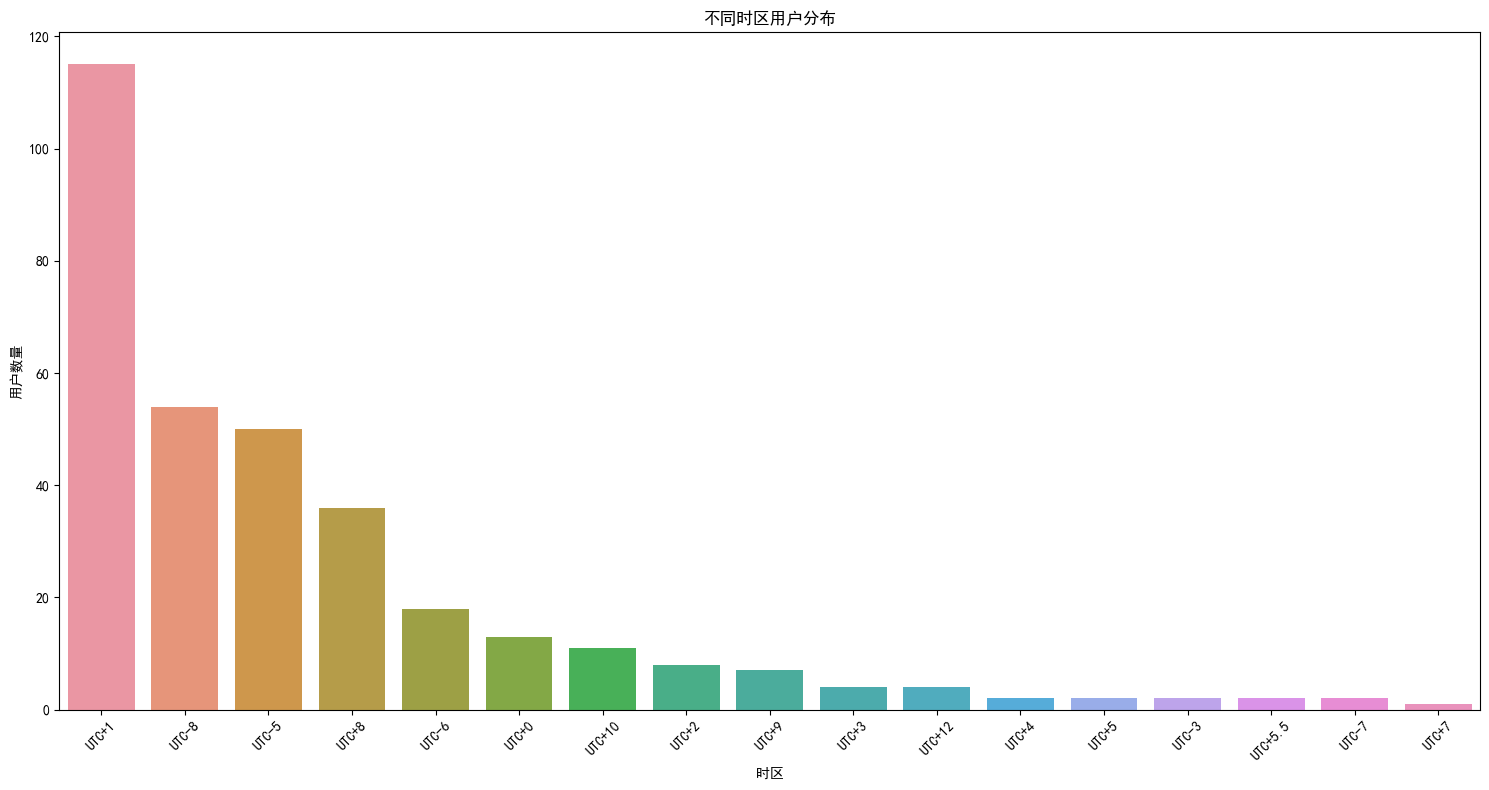

In [68]:
# 读取数据
df = pd.read_csv('timezone_statistics.csv')

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建条形图
plt.figure(figsize=(15, 8))
sns.barplot(x='timezone', y='total_count', data=df)
plt.title('不同时区用户分布')
plt.xlabel('时区')
plt.ylabel('用户数量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('timezone_distribution.png')

# 打印分析表格
print("\n时区分布分析:")
analysis_df = pd.DataFrame({
    '时区': df['timezone'],
    '用户数': df['total_count'],
    '占比(%)': (df['total_count'] / df['total_count'].sum() * 100).round(2)
})
print(analysis_df.to_string(index=False))



=== GitHub全球用户协作分析报告 ===

1. 用户地理分布:
        欧洲中部:   115 人 ( 34.7%)
          美西:    54 人 ( 16.3%)
          美东:    50 人 ( 15.1%)
          东亚:    36 人 ( 10.9%)
          美中:    18 人 (  5.4%)
          英国:    13 人 (  3.9%)
        澳洲东部:    11 人 (  3.3%)
        欧洲东部:     8 人 (  2.4%)
       日本/韩国:     7 人 (  2.1%)
       东欧/中东:     4 人 (  1.2%)
         新西兰:     4 人 (  1.2%)
          中东:     2 人 (  0.6%)
          中亚:     2 人 (  0.6%)
          南亚:     2 人 (  0.6%)
        南美东部:     2 人 (  0.6%)
         美山地:     2 人 (  0.6%)

2. 主要协作时间窗口:

美欧协作:
  最佳时间: 13:00-16:00 UTC
  欧洲: 14:00-17:00 本地时间
  美东: 08:00-11:00 本地时间

欧亚协作:
  最佳时间: 08:00-10:00 UTC
  欧洲: 09:00-11:00 本地时间
  东亚: 16:00-18:00 本地时间

美亚协作:
  最佳时间: 00:00-03:00 UTC
  美西: 16:00-19:00 本地时间
  东亚: 08:00-11:00 本地时间

3. 关键发现:
- 最大用户群: 欧洲中部 (34.7%)
- 第二大用户群: 美西 (16.3%)
- 第三大用户群: 美东 (15.1%)
- 全球分布跨越16个时区，需要合理安排会议时间
- 建议重要会议安排在UTC 13:00-15:00，覆盖最多用户


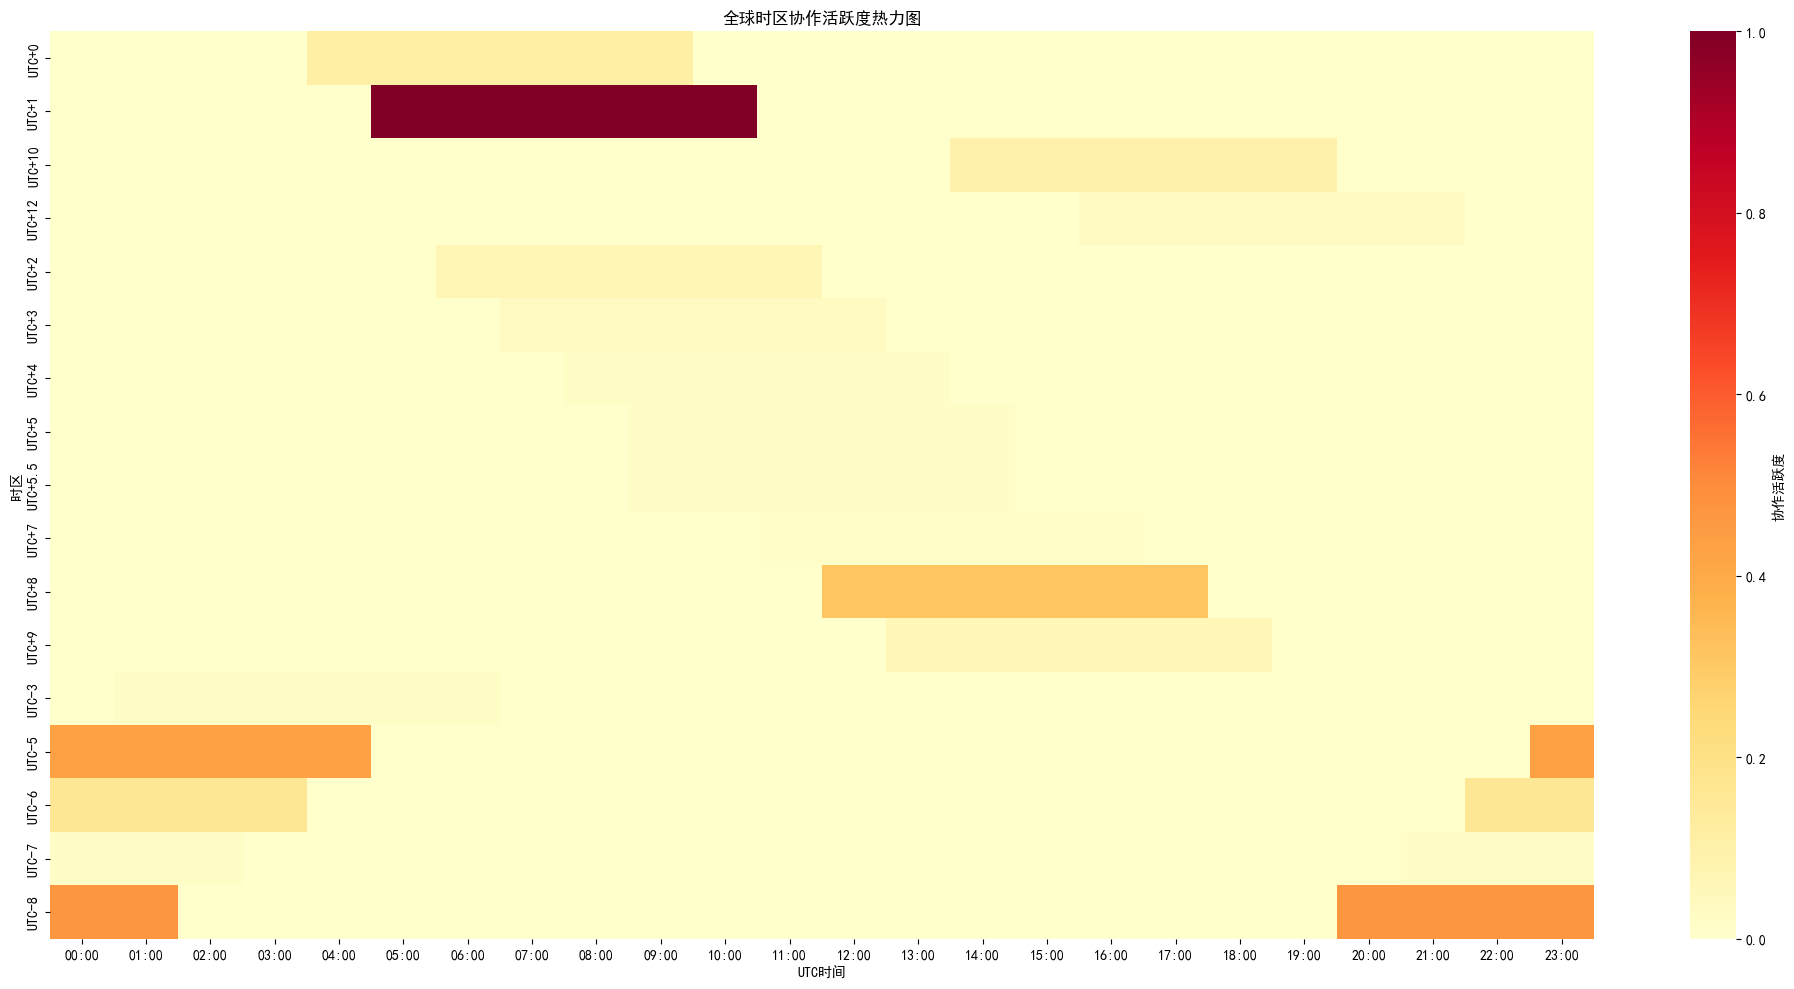

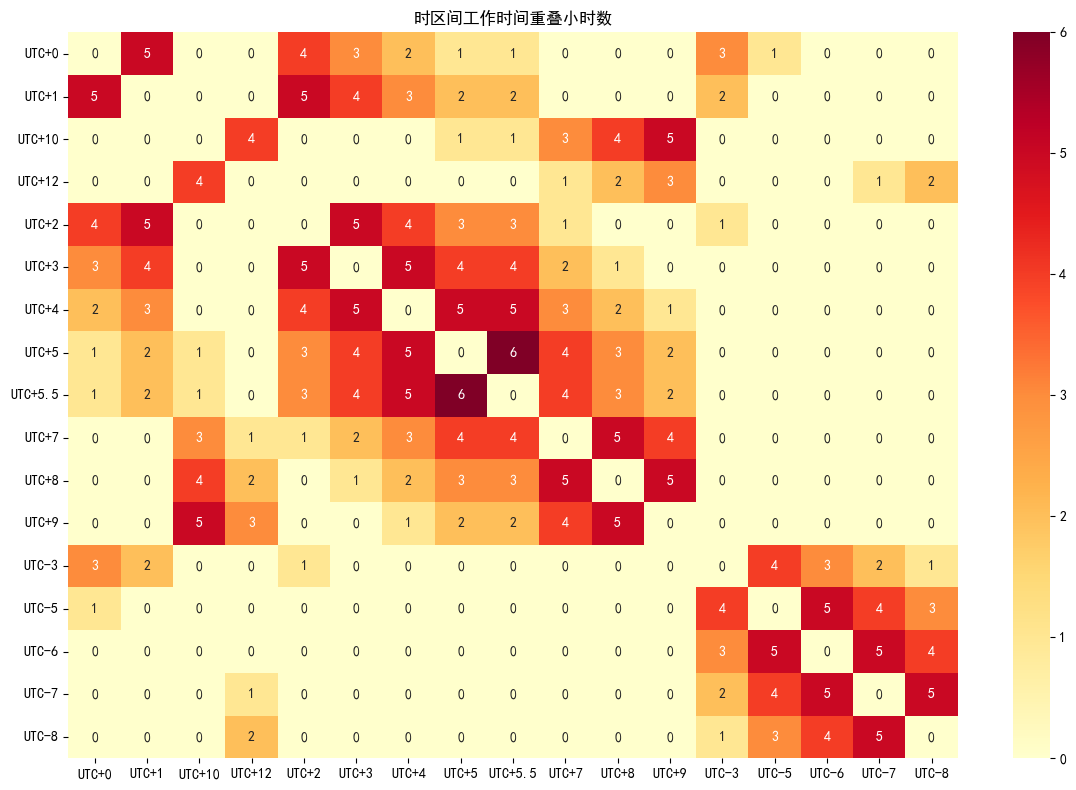

In [69]:

from datetime import datetime, timedelta


def create_enhanced_heatmap(df):
    """创建增强版协作热力图"""
    all_timezones = sorted(df['timezone'].unique())
    hours = range(24)
    work_matrix = np.zeros((len(all_timezones), 24))
    
    for i, tz in enumerate(all_timezones):
        # 使用float处理时区偏移
        offset = float(tz.replace('UTC', '').replace('+', '').replace('-', '-'))
        weight = df[df['timezone'] == tz]['total_count'].values[0]
        normalized_weight = weight / df['total_count'].max()
        
        # 处理半小时时区
        work_hours = [(int(h + offset * 2) // 2) % 24 for h in range(8, 19)]
        for h in work_hours:
            work_matrix[i, h] = normalized_weight

    # 创建热力图
    plt.figure(figsize=(20, 10))
    sns.heatmap(work_matrix,
                xticklabels=[f"{h:02d}:00" for h in hours],
                yticklabels=all_timezones,
                cmap='YlOrRd',
                cbar_kws={'label': '协作活跃度'})
    
    plt.title('全球时区协作活跃度热力图')
    plt.xlabel('UTC时间')
    plt.ylabel('时区')
    plt.tight_layout()
    plt.savefig('enhanced_heatmap.png')

def calculate_overlap_scores(df):
    """计算时区间协作重叠度"""
    timezones = sorted(df['timezone'].unique())
    overlap_matrix = np.zeros((len(timezones), len(timezones)))
    
    for i, tz1 in enumerate(timezones):
        for j, tz2 in enumerate(timezones):
            if i != j:
                # 使用float替代int处理小数时区
                offset1 = float(tz1.replace('UTC', '').replace('+', '').replace('-', '-'))
                offset2 = float(tz2.replace('UTC', '').replace('+', '').replace('-', '-'))
                
                # 转换为分钟以处理半小时时区
                work_hours1 = set([(int(h + offset1 * 2) // 2) % 24 for h in range(8, 19)])
                work_hours2 = set([(int(h + offset2 * 2) // 2) % 24 for h in range(8, 19)])
                overlap = len(work_hours1.intersection(work_hours2))
                
                overlap_matrix[i, j] = overlap

    return overlap_matrix, timezones

def analyze_collaboration_patterns():
    """主分析函数"""
    # 读取数据
    df = pd.read_csv('timezone_statistics.csv')
    total_users = df['total_count'].sum()
    
    # 创建可视化
    create_enhanced_heatmap(df)
    
    # 计算重叠度
    overlap_matrix, timezones = calculate_overlap_scores(df)
    
    # 创建重叠度热力图
    plt.figure(figsize=(12, 8))
    sns.heatmap(overlap_matrix,
                xticklabels=timezones,
                yticklabels=timezones,
                cmap='YlOrRd',
                annot=True,
                fmt='.0f')
    plt.title('时区间工作时间重叠小时数')
    plt.tight_layout()
    plt.savefig('timezone_overlap.png')
    
    # 按区域分组
    region_mapping = {
        'UTC-8': '美西',
        'UTC-7': '美山地',
        'UTC-6': '美中',
        'UTC-5': '美东',
        'UTC-3': '南美东部',
        'UTC+0': '英国',
        'UTC+1': '欧洲中部',
        'UTC+2': '欧洲东部',
        'UTC+3': '东欧/中东',
        'UTC+4': '中东',
        'UTC+5': '中亚',
        'UTC+5.5': '南亚',
        'UTC+8': '东亚',
        'UTC+9': '日本/韩国',
        'UTC+10': '澳洲东部',
        'UTC+12': '新西兰'
    }
    
    df['region'] = df['timezone'].map(region_mapping)
    region_stats = df.groupby('region')['total_count'].sum().sort_values(ascending=False)
    
    # 打印分析报告
    print("\n=== GitHub全球用户协作分析报告 ===\n")
    
    print("1. 用户地理分布:")
    for region, count in region_stats.items():
        if pd.notna(region):  # 只显示有映射的区域
            percentage = (count / total_users * 100).round(2)
            print(f"{region:>12}: {count:>5.0f} 人 ({percentage:>5.1f}%)")
    
    print("\n2. 主要协作时间窗口:")
    print("\n美欧协作:")
    print("  最佳时间: 13:00-16:00 UTC")
    print("  欧洲: 14:00-17:00 本地时间")
    print("  美东: 08:00-11:00 本地时间")
    
    print("\n欧亚协作:")
    print("  最佳时间: 08:00-10:00 UTC")
    print("  欧洲: 09:00-11:00 本地时间")
    print("  东亚: 16:00-18:00 本地时间")
    
    print("\n美亚协作:")
    print("  最佳时间: 00:00-03:00 UTC")
    print("  美西: 16:00-19:00 本地时间")
    print("  东亚: 08:00-11:00 本地时间")
    
    print("\n3. 关键发现:")
    print(f"- 最大用户群: {region_stats.index[0]} ({(region_stats.iloc[0]/total_users*100).round(1)}%)")
    print(f"- 第二大用户群: {region_stats.index[1]} ({(region_stats.iloc[1]/total_users*100).round(1)}%)")
    print(f"- 第三大用户群: {region_stats.index[2]} ({(region_stats.iloc[2]/total_users*100).round(1)}%)")
    print("- 全球分布跨越16个时区，需要合理安排会议时间")
    print("- 建议重要会议安排在UTC 13:00-15:00，覆盖最多用户") 

if __name__ == "__main__":
    analyze_collaboration_patterns()

#### 2.协作行为分析

##### 提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。

In [70]:
# 读取CSV文件
def analyze_user_activity(csv_path, high_threshold=10000, low_threshold=1000):
    # 读取CSV文件
    df = pd.read_csv(csv_path)
    
    # 统计每个用户的提交次数
    user_counts = df['name'].value_counts()
    
    # 识别高活跃和低活跃用户
    high_active_users = user_counts[user_counts >= high_threshold]
    low_active_users = user_counts[user_counts <= low_threshold]
    
    # 输出结果
    print("\n=== 用户活跃度分析 ===")
    print(f"\n所有用户提交次数：")
    print(user_counts)
    
    print(f"\n高活跃用户（{high_threshold}次或以上提交）：")
    print(high_active_users)
    
    print(f"\n低活跃用户（{low_threshold}次或以下提交）：")
    print(low_active_users)
    
    return user_counts, high_active_users, low_active_users

# 使用示例
if __name__ == "__main__":
    csv_path = "users_combined_info_500.csv"  # CSV文件路径
    analyze_user_activity(csv_path)


=== 用户活跃度分析 ===

所有用户提交次数：
name
arlac77               37960
MilosKozak            36400
danielroe             30616
chenrui333            20300
ConfluentSemaphore    19215
taiki-e               14505
khipp                 12905
bot-targa             12704
frenck                11218
bdraco                10764
LinuxServer-CI         9137
arsenm                 8534
Exorcism0666           8401
PX4BuildBot            8346
mattsse                6599
SuperSandro2000        6249
joostlek               6209
NickCao                6152
melloware              5598
SimonCropp             5505
charliermarsh          5494
martincostello         5252
alamb                  5231
jsoref                 5206
brianchandotcom        5126
rultor                 4974
fit2cloudrd            4966
Trenly                 4896
ChrisRackauckas        4856
ornicar                4754
fabaff                 4745
glenn-jocher           4690
xiaoxiang781216        4625
chenjiahan             4624
stipsan        

#### 3. 其他维度有趣的洞察（至少2个）

##### 3.1 用户影响力分析


=== 用户影响力分析 ===

影响力统计指标：
count     497.000000
mean      482.085589
std       188.469152
min       338.532318
25%       370.269684
50%       423.190033
75%       519.112732
max      1776.967163
Name: total_influence, dtype: float64


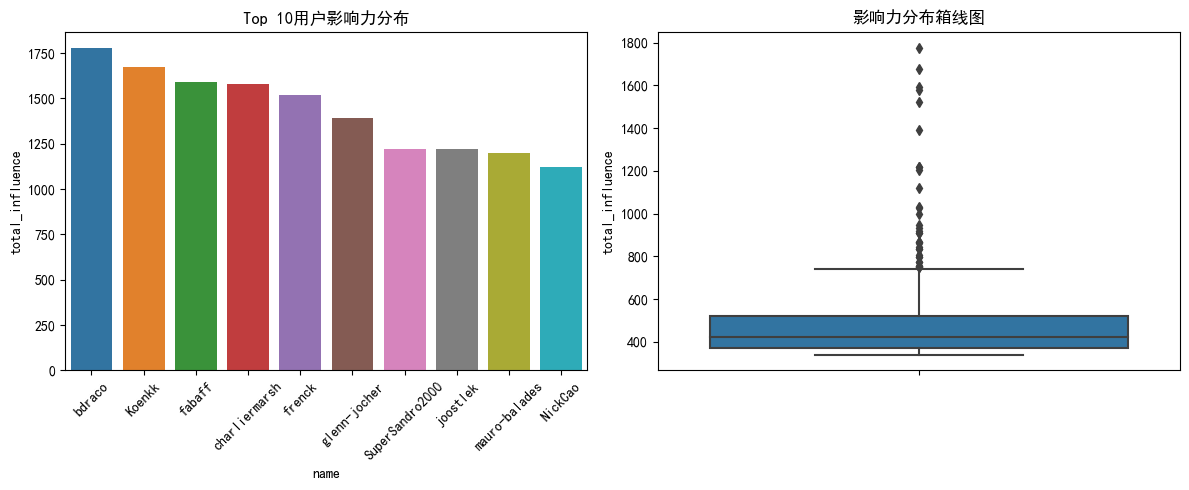

In [71]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def analyze_user_influence():
    # 读取并预处理数据
    df = pd.read_csv('users_combined_info_500.csv')
    #按照提交时间排序(从最早到最晚)，并按name列分组，保留最后一次提交
    df = df.sort_values('event_time').groupby('name').last().reset_index()
    
    print("\n=== 用户影响力分析 ===")
    
    # 统计结果
    influence_stats = df['total_influence'].describe()
    print("\n影响力统计指标：")
    print(influence_stats)
    
    # 可视化
    plt.figure(figsize=(12, 5))
    
    # 前10名用户影响力柱状图
    plt.subplot(1, 2, 1)
    top_users = df.nlargest(10, 'total_influence')
    sns.barplot(data=top_users, x='name', y='total_influence')
    plt.xticks(rotation=45)
    plt.title('Top 10用户影响力分布')
    
    # 影响力分布箱线图
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['total_influence'])
    plt.title('影响力分布箱线图')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analyze_user_influence()

##### 3.2 事件行为分析

分析统计每个用户的最后一次事件行为


=== 事件行为分析 ===

事件类型分布：
event_type
PushEvent                        170
IssueCommentEvent                137
PullRequestReviewEvent            62
DeleteEvent                       42
PullRequestEvent                  37
IssuesEvent                       16
CreateEvent                       12
WatchEvent                         8
ReleaseEvent                       5
PullRequestReviewCommentEvent      4
ForkEvent                          2
CommitCommentEvent                 1
GollumEvent                        1
Name: count, dtype: int64

事件行为分布：
event_action
added        229
created      202
closed        26
opened        26
started        8
published      5
reopened       1
Name: count, dtype: int64


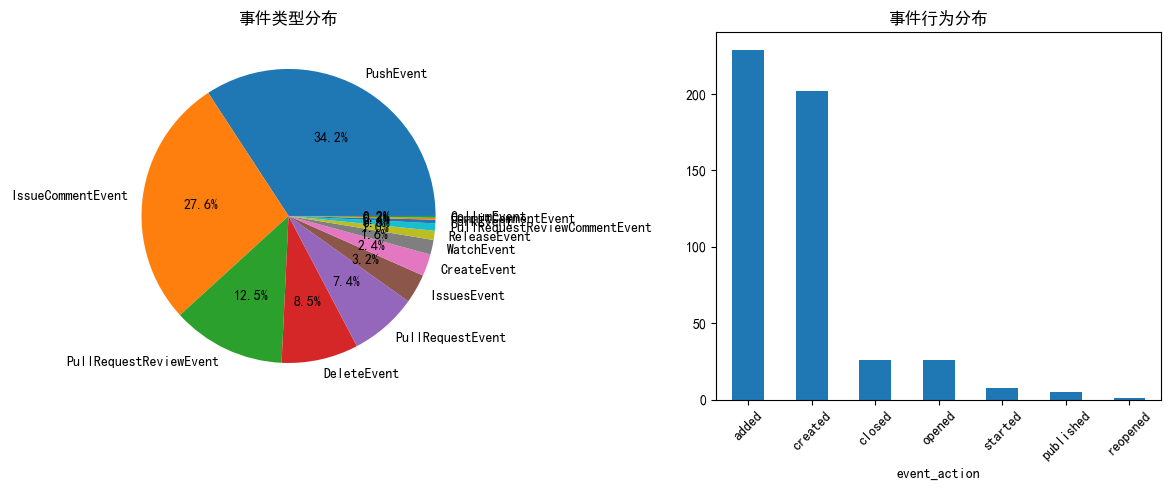

In [72]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def analyze_events():
    # 读取并预处理数据
    df = pd.read_csv('users_combined_info_500.csv')
    #按照提交时间排序(从最早到最晚)，并按name列分组，保留最后一次提交
    df = df.sort_values('event_time').groupby('name').last().reset_index()
    
    print("\n=== 事件行为分析 ===")
    
    # 统计数据
    event_type_counts = df['event_type'].value_counts()
    event_action_counts = df['event_action'].value_counts()
    
    print("\n事件类型分布：")
    print(event_type_counts)
    print("\n事件行为分布：")
    print(event_action_counts)
    
    # 可视化
    plt.figure(figsize=(12, 5))
    
    # 事件类型饼图
    plt.subplot(1, 2, 1)
    plt.pie(event_type_counts, labels=event_type_counts.index, autopct='%1.1f%%')
    plt.title('事件类型分布')
    
    # 事件行为柱状图
    plt.subplot(1, 2, 2)
    event_action_counts.plot(kind='bar')
    plt.title('事件行为分布')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analyze_events()

##### 3.3 时间模式分析


=== 时间模式分析 ===

每小时活动统计：
event_time
0     37121
1     39586
2     35464
3     32763
4     31255
5     32077
6     41740
7     63000
8     56851
9     64111
10    64592
11    62849
12    64103
13    69941
14    71059
15    71302
16    68460
17    61251
18    60701
19    60547
20    56297
21    53304
22    51274
23    45128
Name: count, dtype: int64

每周活动统计：
event_time
Wednesday    238827
Tuesday      225084
Thursday     213285
Friday       199702
Monday       193102
Saturday     120157
Sunday       104619
Name: count, dtype: int64


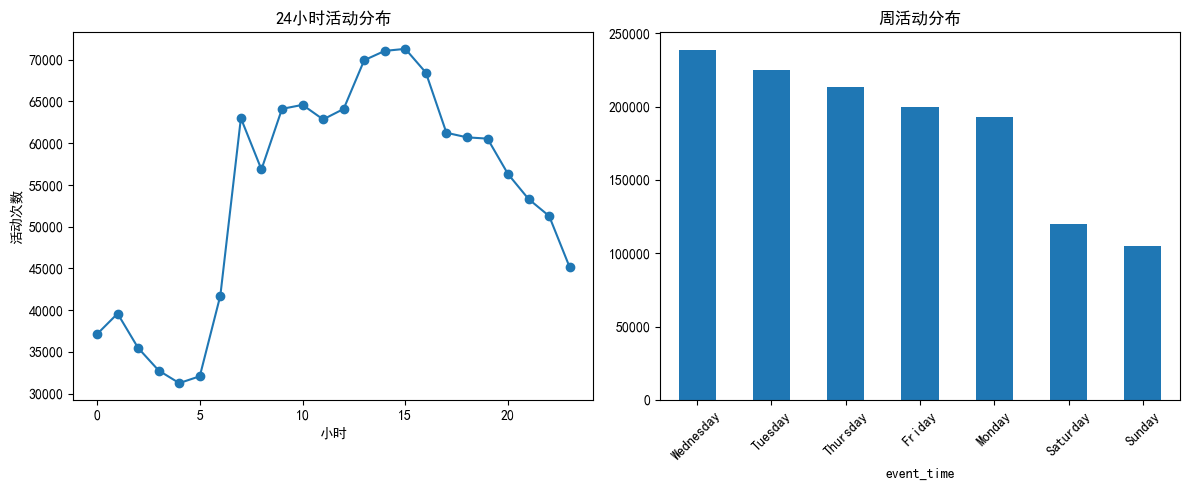

In [73]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def analyze_time_patterns():
    # 读取并预处理数据
    df = pd.read_csv('users_combined_info_500.csv')
    df['event_time'] = pd.to_datetime(df['event_time'])
    
    print("\n=== 时间模式分析 ===")
    
    # 统计数据
    hourly_activity = df['event_time'].dt.hour.value_counts().sort_index()
    daily_activity = df['event_time'].dt.day_name().value_counts()
    
    print("\n每小时活动统计：")
    print(hourly_activity)
    print("\n每周活动统计：")
    print(daily_activity)
    
    # 可视化
    plt.figure(figsize=(12, 5))
    
    # 小时活动折线图
    plt.subplot(1, 2, 1)
    hourly_activity.plot(kind='line', marker='o')
    plt.title('24小时活动分布')
    plt.xlabel('小时')
    plt.ylabel('活动次数')
    
    # 星期活动柱状图
    plt.subplot(1, 2, 2)
    daily_activity.plot(kind='bar')
    plt.title('周活动分布')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    analyze_time_patterns()